
🎯 Gradient Boosting Classifier Results
Accuracy: 0.6469412235105958

Classification Report:
               precision    recall  f1-score   support

           0      0.677     0.824     0.743      1293
           1      0.597     0.537     0.566      1020
           2      0.000     0.000     0.000       110
           3      0.667     0.071     0.129        56
           4      0.000     0.000     0.000        15
           5      0.000     0.000     0.000         2
           6      0.000     0.000     0.000         5
           7      0.000     0.000     0.000         0
           8      0.000     0.000     0.000         0

    accuracy                          0.647      2501
   macro avg      0.216     0.159     0.160      2501
weighted avg      0.608     0.647     0.618      2501



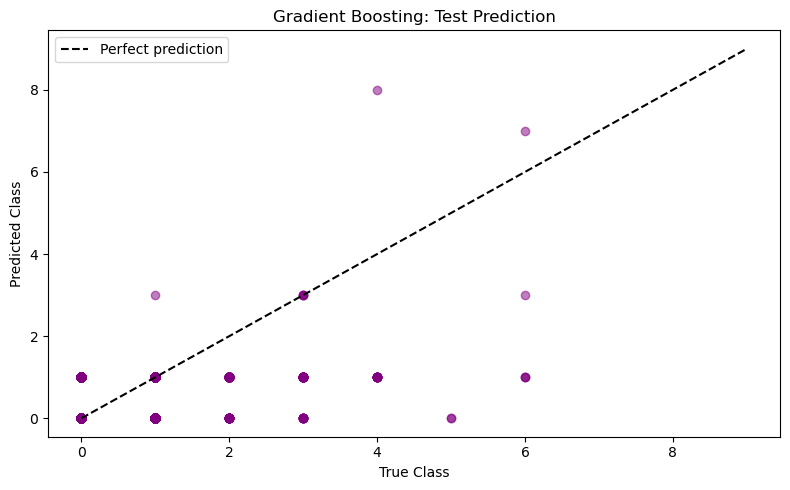


Predictions for new data: [0 9 9]

Hand 1: Predicted class 0, top-3 confidences:
   Rank 0: 0.434
   Rank 1: 0.365
   Rank 5: 0.153

Hand 2: Predicted class 9, top-3 confidences:
   Rank 9: 0.987
   Rank 0: 0.006
   Rank 1: 0.006

Hand 3: Predicted class 9, top-3 confidences:
   Rank 9: 0.992
   Rank 5: 0.006
   Rank 0: 0.001


In [2]:
# ============================================================
# Poker Hand Gradient Boosting Classifier (using original structure)
# ============================================================

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# !################################
# Data Loading
# !################################
cols = ['S1','R1','S2','R2','S3','R3','S4','R4','S5','R5','ORD']
poker_df = pd.read_csv('poker-hand-training-true.data', skiprows=1, header=None, names=cols)


# !################################
# Test Train Split
# !################################
X = poker_df[['S1','R1','S2','R2','S3','R3','S4','R4','S5','R5']]
y = poker_df['ORD']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.11, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# !################################
# Train Gradient Boosting Model
# !################################
gb_final = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_final.fit(X_train_scaled, y_train)

# !################################
# Evaluation
# !################################
y_pred = gb_final.predict(X_test_scaled)

print("\n🎯 Gradient Boosting Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

# !################################
# Scatter Plot (same as KNN/RF)
# !################################
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='purple', alpha=0.5)
plt.plot([0,9],[0,9],'k--',label='Perfect prediction')
plt.title("Gradient Boosting: Test Prediction")
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.legend()
plt.tight_layout()
plt.show()

# !################################
# Predict on sample 5-card hands
# !################################
new_data = pd.DataFrame({
    'S1': [1, 2, 4],
    'R1': [10, 11, 1],
    'S2': [1, 2, 4],
    'R2': [11, 13, 13],
    'S3': [1, 2, 4],
    'R3': [13, 10, 12],
    'S4': [1, 2, 4],
    'R4': [12, 12, 11],
    'S5': [1, 2, 4],
    'R5': [1, 1, 10]
})

new_scaled = scaler.transform(new_data)
new_pred = gb_final.predict(new_scaled)
new_prob = gb_final.predict_proba(new_scaled)

print("\nPredictions for new data:", new_pred)
for i, (pred, probs) in enumerate(zip(new_pred, new_prob)):
    top3 = sorted(list(zip(range(len(probs)), probs)), key=lambda x: x[1], reverse=True)[:3]
    print(f"\nHand {i+1}: Predicted class {pred}, top-3 confidences:")
    for cls, pr in top3:
        print(f"   Rank {cls}: {pr:.3f}")


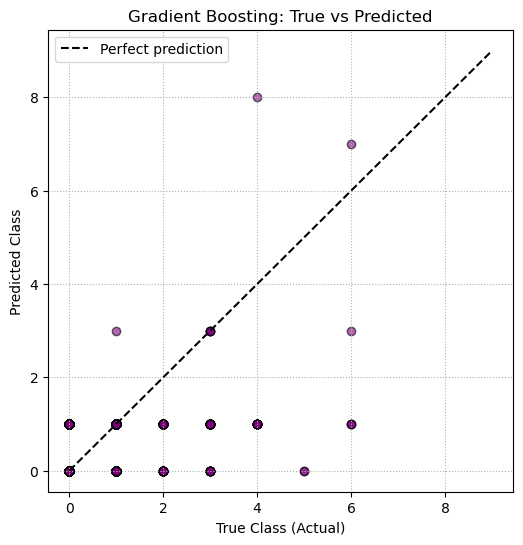

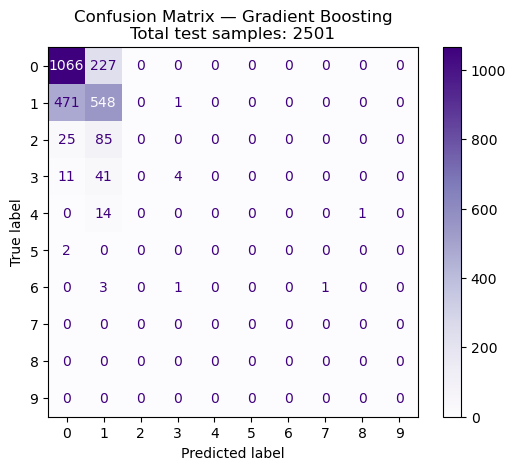


✅ Gradient Boosting Evaluation Summary:
Accuracy: 0.647
F1 (macro): 0.160
F1 (weighted): 0.618

Classification Report:
              precision    recall  f1-score   support

           0      0.677     0.824     0.743      1293
           1      0.597     0.537     0.566      1020
           2      0.000     0.000     0.000       110
           3      0.667     0.071     0.129        56
           4      0.000     0.000     0.000        15
           5      0.000     0.000     0.000         2
           6      0.000     0.000     0.000         5
           7      0.000     0.000     0.000         0
           8      0.000     0.000     0.000         0

    accuracy                          0.647      2501
   macro avg      0.216     0.159     0.160      2501
weighted avg      0.608     0.647     0.618      2501



In [3]:
# ============================================================
# 📊 Visualization & Evaluation — Gradient Boosting (same as KNN/RF)
# ============================================================
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

# --- 1️⃣ Scatter Plot: True vs Predicted ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple', edgecolors='k')
plt.plot([0,9], [0,9], 'k--', label='Perfect prediction')
plt.xlabel("True Class (Actual)")
plt.ylabel("Predicted Class")
plt.title("Gradient Boosting: True vs Predicted")
plt.legend()
plt.grid(True, linestyle=':')
plt.show()

# --- 2️⃣ Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred, labels=range(10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap="Purples", values_format='d')
plt.title(f"Confusion Matrix — Gradient Boosting\nTotal test samples: {len(y_test)}")
plt.show()

# --- 3️⃣ Accuracy & F1 scores ---
acc = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print("\n✅ Gradient Boosting Evaluation Summary:")
print(f"Accuracy: {acc:.3f}")
print(f"F1 (macro): {f1_macro:.3f}")
print(f"F1 (weighted): {f1_weighted:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))
